## Yash Patel
## 4/9/24
## CMP262 Final Project

#### Dataset: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset?resource=download

#### Potential Client/Value of my Analysis:
##### By analyzing the dataset, the Mental Health Association in New Jersey can uncover correlations and patterns between linguistic features, sentiment, and mental health indicators. These insights can inform interventions, policies, and support systems aimed at promoting mental well-being. Furthermore, the dataset offers opportunities for developing predictive models to identify or predict mental health outcomes based on textual data. This can be useful for early intervention and support.

#### 5 Questions: 
##### Is there a correlation between occupation and growing stress?
##### Is there a correlation between gender and treatment seeking?
##### Is there a correlation between family history and personal mental health history?
##### Is there a correlation between days spent indoors and social weakness?
##### Is there a correlation between mood swings and work interest?


### Initial Exploratory Analysis:

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
mental_health = pd.read_csv('Mental Health Dataset.csv')

In [3]:
# List all the columns in the dataset
columns_list = mental_health.columns

# Print the list of column names
print(columns_list)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [4]:
# Check for missing values in each column
missing_values_count = mental_health.isnull().sum()

# Print the count of missing values for each column
print(missing_values_count)

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [5]:
# Drop Rows with Missing self_employed Values
mental_health = mental_health.dropna(subset=['self_employed'])

In [6]:
# Check for missing values in each column - should be 0
missing_values_count = mental_health.isnull().sum()

# Print the count of missing values for each column
print(missing_values_count)

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [7]:
mental_health.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162
unique,574,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,235950,168056,65173,257994,173668,144744,62429,98225,107579,102179,99272,151609,103964,101559,229304,116502


In [8]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287162 entries, 3 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                287162 non-null  object
 1   Gender                   287162 non-null  object
 2   Country                  287162 non-null  object
 3   Occupation               287162 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           287162 non-null  object
 6   treatment                287162 non-null  object
 7   Days_Indoors             287162 non-null  object
 8   Growing_Stress           287162 non-null  object
 9   Changes_Habits           287162 non-null  object
 10  Mental_Health_History    287162 non-null  object
 11  Mood_Swings              287162 non-null  object
 12  Coping_Struggles         287162 non-null  object
 13  Work_Interest            287162 non-null  object
 14  Social_Weakness          

In [9]:
mental_health.sample()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
115140,8/29/2014 10:38,Male,United States,Housewife,No,Yes,Yes,15-30 days,No,Yes,Maybe,Medium,Yes,Yes,Maybe,Maybe,Not sure


### Data Cleaning

In [11]:
# Rename the columns to a lower-case word (easier to work with)
mental_health.rename(columns=str.lower, inplace=True)
mental_health.sample()

,timestamp,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
175101,8/27/2014 15:25,Male,Canada,Housewife,No,No,Yes,Go out Every day,No,Yes,Maybe,Medium,Yes,No,Maybe,No,Not sure


In [14]:
# Remove columns that are not relevant to the 5 questions I will be answering. 
mh2 = mental_health.drop(columns = ['self_employed', 'changes_habits', 'coping_struggles', 'mental_health_interview', 'care_options'])
mh2.sample()

,timestamp,gender,country,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,work_interest,social_weakness
52254,8/29/2014 14:51,Female,United States,Housewife,Yes,Yes,Go out Every day,Maybe,No,Medium,No,No


In [15]:
# Check for missing values in each column
missing_values_count = mh2.isnull().sum()

# Print the count of missing values for each column
print(missing_values_count)

timestamp                0
gender                   0
country                  0
occupation               0
family_history           0
treatment                0
days_indoors             0
growing_stress           0
mental_health_history    0
mood_swings              0
work_interest            0
social_weakness          0
dtype: int64


In [16]:
# The to_csv function will allow me to save the cleaned csv file locally. 
mh2.to_csv("/Users/ytpatel3/Downloads/mental_health_cleaned.csv")

### Data Analysis and Visualization

In [45]:
# import cleaned csv file from Part 2
df = pd.read_csv('mental_health_cleaned.csv')
df.sample()

,Unnamed: 0,timestamp,gender,country,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,work_interest,social_weakness
200104,203876,8/27/2014 12:34,Male,United Kingdom,Corporate,Yes,No,Go out Every day,Maybe,No,Medium,Yes,No


### Question 1
### Is there a correlation between gender and treatment seeking?

In [19]:
# figure out if male or females are more likely to ask for help

gender_distribution = df['gender'].value_counts() # counts the occurrences of each unique value in the 'gender' column (men and women0
print("Gender Distribution:\n", gender_distribution)

treatment_by_gender = pd.crosstab(df['gender'], df['treatment']) # cross tabulation to compute the frequency of occurrences of each combination of gender and treatment seeking
print("\nTreatment by Gender:\n", treatment_by_gender)

# normalize the counts in treatment_by_gender table by dividing each count by the total count for its respective gender
treatment_by_gender_proportions = treatment_by_gender.div(treatment_by_gender.sum(1), axis=0) # gives proportions instead of absolute counts, allowing for easier comparison of treatment distributions across genders
print("\nProportions of Treatment by Gender:\n", treatment_by_gender_proportions)


Gender Distribution:
 gender
Male      235950
Female     51212
Name: count, dtype: int64

Treatment by Gender:
 treatment      No     Yes
gender                   
Female      16058   35154
Male       126360  109590

Proportions of Treatment by Gender:
 treatment        No       Yes
gender                       
Female     0.313559  0.686441
Male       0.535537  0.464463


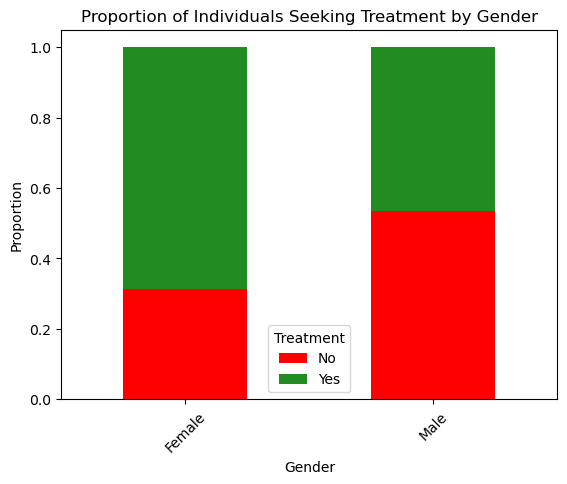

In [22]:
# visualize Question 1's findings

# plot the proportions of individuals seeking treatment by gender
colors = ['red', 'forestgreen']
treatment_by_gender_proportions.plot(kind='bar', stacked=True, color=colors)
plt.title('Proportion of Individuals Seeking Treatment by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.xticks(rotation=45)
plt.legend(title='Treatment', labels=['No', 'Yes'])
plt.show()


### From the data above, we can answer question 1 by saying, proportionately, men seek treatment less than women. About 70% of women in the dataset seek treatment, whereas only about 45% of men seek treatment. Therefore, interventions, policies, and support systems should prioritize marketing towards males. 

### Question 2
### Is there a correlation between days spent indoors and social weakness?

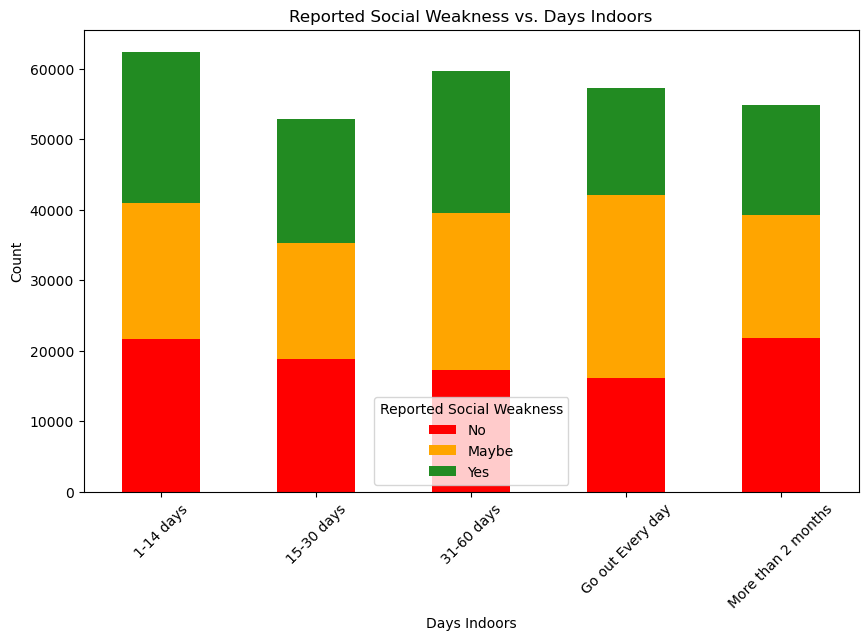

In [28]:
# cross tabulation to compute the frequency of occurrences of each combination of days_indoor and social_weakness
cross_tab_stress = pd.crosstab(df['days_indoors'], df['social_weakness'])

# order columns in increasing positive values)
cross_tab_stress = cross_tab_stress[['No', 'Maybe', 'Yes']]

# visualize the relationship between days_indoors and social_weakness
colors2 = ['red', 'orange', 'forestgreen']
cross_tab_stress.plot(kind='bar', stacked=True, figsize=(10, 6), color = colors2)
plt.title('Reported Social Weakness vs. Days Indoors')
plt.xlabel('Days Indoors')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Reported Social Weakness')
plt.show()

### From the data above, we can answer question 2 by saying that those who go out every day report the lowest amount of social weakness. However, the quantitative data of all 4 columns are quite similar. Therefore, the data is somewhat inconclusive and we cannot make any generalizations/predictions.

### Question 3
### Is there a correlation between occupation and growing stress?

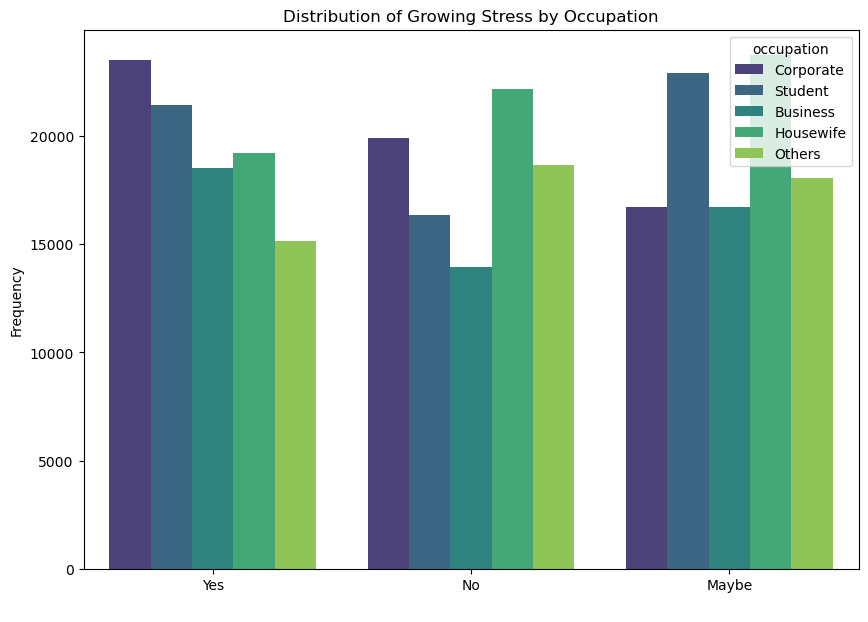

In [51]:
# List all the occupations in the dataset
np.unique(df['occupation'])

# Check all the unique values for growing stress
np.unique(df['growing_stress'])

# Visualise the proportion of growing stress for every occupation
plt.figure(figsize=(10, 7))

# learned about sns.countplot() from https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/
# seaborn palettes found at https://seaborn.pydata.org/tutorial/color_palettes.html (viridis reminded me of CCM colors)
sns.countplot(x='growing_stress', data=df, palette = 'viridis', hue='occupation')

plt.title('Distribution of Growing Stress by Occupation')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

### The graph shows us that the highest growing stress is found amongst the corporate individuals, students, and housewives. However, there's also a high number of corporate individuals and housewives that did not experience growing stress. Thus, one could assume that students have the highest rates of growing stress. However, this data is not concrete enough to support assumptions that occupations are directly responsible for growing stress due to the high number of maybes.

### Question 4
### Is there a correlation between family history and personal mental health history?

In [48]:
df.head()

,Unnamed: 0,timestamp,gender,country,occupation,family_history,treatment,days_indoors,growing_stress,mental_health_history,mood_swings,work_interest,social_weakness
0,3,8/27/2014 11:37,Female,United States,Corporate,Yes,Yes,1-14 days,Yes,Yes,Medium,No,Yes
1,4,8/27/2014 11:43,Female,United States,Corporate,Yes,Yes,1-14 days,Yes,Yes,Medium,No,Yes
2,5,8/27/2014 11:49,Female,Poland,Corporate,No,Yes,1-14 days,Yes,Yes,Medium,No,Yes
3,6,8/27/2014 11:51,Female,Australia,Corporate,Yes,Yes,1-14 days,Yes,Yes,Medium,No,Yes
4,7,8/27/2014 11:52,Female,United States,Corporate,No,No,1-14 days,Yes,Yes,Medium,No,Yes


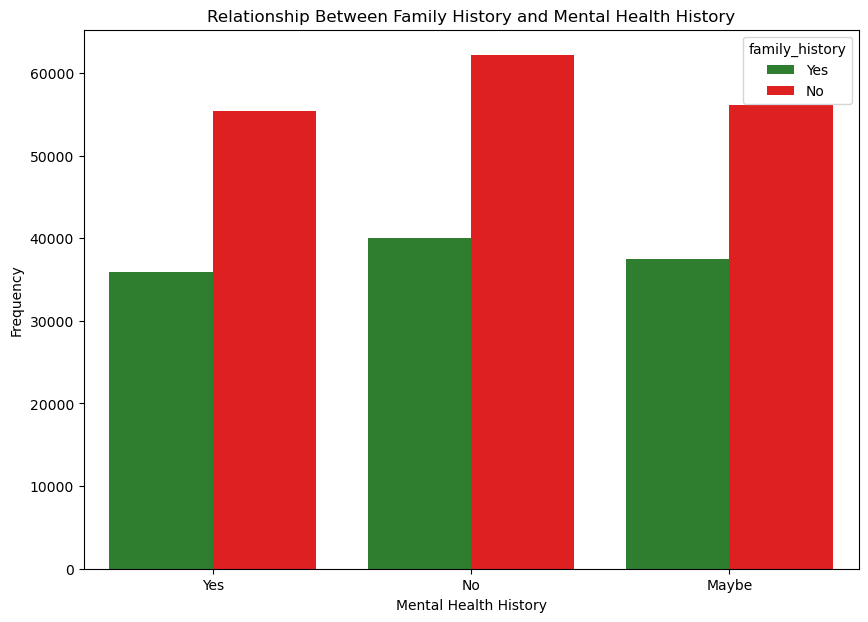

In [58]:
# Check all the unique values for family history and mental health history
np.unique(df['family_history'])
np.unique(df['mental_health_history'])

# Correlation between family history and mh history
plt.figure(figsize=(10, 7))
sns.countplot(x='mental_health_history', data=df, hue='family_history',  palette = ['forestgreen', 'red'])
plt.title('Relationship Between Family History and Mental Health History')
plt.xlabel('Mental Health History')
plt.ylabel('Frequency')
plt.show()

### Amongst the data of individuals with mental health history, there is a higher occurence amongst those without family history. Surprisingly, this trend is also observed in two other groups of mental health history. Therefore, family history is not a good indicator of having mental health struggles.

### Question 5
### Is there a correlation between mood swings and work interest?

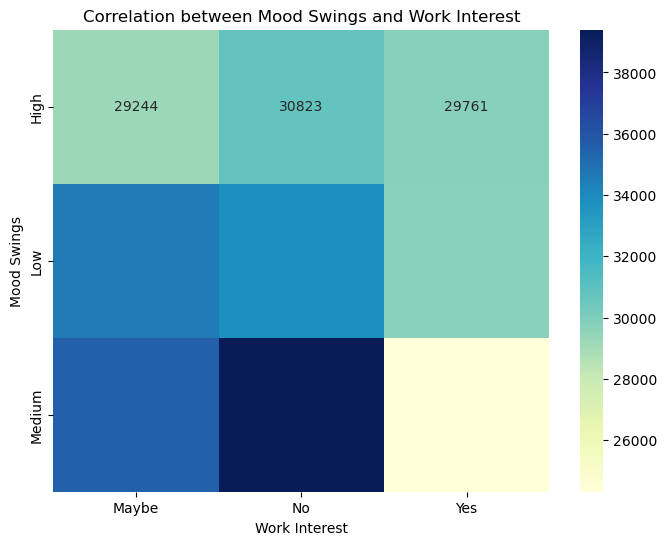

In [64]:
# create a heatmap to visually inspect any correlation or association between the 'mood_swings' and 'work_interest' variables. 
# if there's a correlation, you'll see higher values in certain cells of the heatmap.

# Creating a cross-tabulation
cross_tab = pd.crosstab(df['mood_swings'], df['work_interest'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))

# the colormap is set to "YlGnBu", which stands for Yellow-Green-Blue. 
# colormap transitions from yellow for low values, through green for intermediate values, to blue for high values.
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='d')

plt.title('Correlation between Mood Swings and Work Interest')
plt.xlabel('Work Interest')
plt.ylabel('Mood Swings')
plt.show()

### The heatmap shows us that there is a strong correlation between a medium level of mood swings and no work interest. There is also no correlation between mood swings and 'yes' for work interest. This heatmap proves that those who suffer from mood swings are less productive/willing to work. Mental health resources and methods to deal with mood swings should be provided by corporate workplaces to ensure worker productivity. 